# Predicting monthly Sales of Champagne using ARIMA and Seasonal ARIMA 

## Autoregressive Integrated Moving Averages.

The general process of ARIMA is th efollowing:-

1. Visualize the time series data
2. Make the time series data stationary
3. Plot the correlation and Auto-Correlation charts
4. Construct The ARIMA model or Seasonal ARIMA based on the data
5. Use the model to make predictions.

Lets go thru these steps.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [7]:
df=pd.read_csv(r"/Users/sunandakumarghosh/Desktop/My Analytics Project/Kaggle/champagne.csv")

In [8]:
df.head()

,Month,Perrin Freres Monthly Data Sales Millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [9]:
df.tail()

,Month,Perrin Freres Monthly Data Sales Millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [12]:
#Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [13]:
#Dropping the last two cols having Nan values...
#df.drop(106,axis=0,inplace=True)
#df.drop(106,axis=0,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [15]:
#Change Month to Datetime format
df['Month']=pd.to_datetime(df['Month'])

In [16]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [17]:
#Set month column as index

df.set_index('Month',inplace=True)

In [18]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [19]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize the data

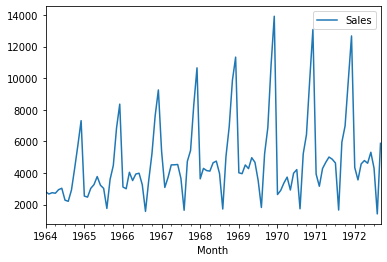

In [20]:
df.plot()

Data is seasonal hence the spikes. Is there any stationarity? To check the stationarity we apply the Dickey Fuller Test.

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
test_result=adfuller(df['Sales'])

In [47]:
#H0:There is no stationarity
#H1:There is stationarity.
#A function is written to have compact results of Dicker Fuller Test.

def adfuller_test(sales):
# The Dicker-Fuller test is used below.
    result=adfuller(sales)
    labels=['ADF Test statistic','p-value','#Lags Used','Number of Obs used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
            print("Strong evidence against null hypothesis(H0), reject the null hypothesis. Data has stationarity.")
    else:
             print("Strong evidence against against null hypothesis(H0), accept the null hypothesis. Data has no stationarity. Time-series has a unit root.")
            

adfuller_test(df['Sales'])

# Differencing

To make the series stationary, we are going to shift the sales by observation/row and take the first difference.

In [29]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [30]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [31]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0


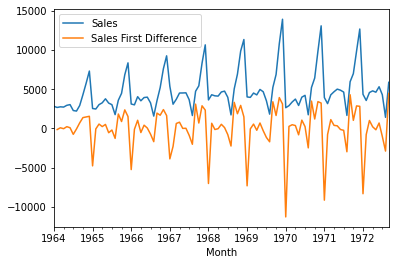

In [32]:
df.plot()

Since the Sales data has seasonality as well so we will take the differencing w.r.t 12 months as well.

In [33]:
df['Seasonal Shift Difference'] = df['Sales'] - df['Sales'].shift(12)

In [35]:
df.head(n=20)

,Sales,Sales First Difference,Seasonal Shift Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


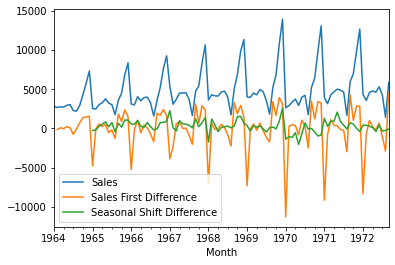

In [36]:
df.plot()

In [42]:
#Again test Dicker Fuller Test on Sales First Difference.

adfuller_test(df['Sales First Difference'].dropna())

ADF Test statistic : -7.189896448050998
p-value : 2.519620447387099e-10
#Lags Used : 11
Number of Obs used : 92
Strong evidence against null hypothesis(H0), reject the null hypothesis. Data has stationarity.


In [43]:
#Dicker Fuller Test on Seasonal Shift Difference.

adfuller_test(df['Seasonal Shift Difference'].dropna())

ADF Test statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Obs used : 92
Strong evidence against null hypothesis(H0), reject the null hypothesis. Data has stationarity.


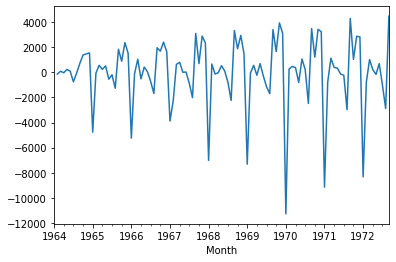

In [44]:
df['Sales First Difference'].plot()

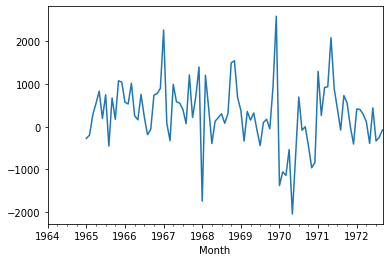

In [46]:
df['Seasonal Shift Difference'].plot()

# Auto-Regressive Model

yt = c + @1yt-1 + @2yt-2 + @3yt-3 +......+ @pyt-p + et

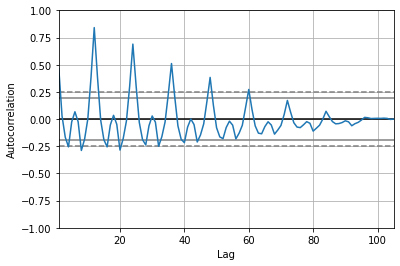

In [53]:
# How many lags are to be taken in the AR model? Autocorrelation plot will tell.

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
  * For an AR model, the theoretical PACF "shuts off" past the order of the model. The phrase "shuts off" means that in theory the partial autocorrelations are  equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the "order of the model" we mean the most extreme lag of x that is used as a predictor.

* Identification of the MA model is often best done wit the ACF rather than the PACF.
  * For an MA model, the theoretical PACF does not shut off, but instead tapers towards 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
  
  p,d,q - Three parameters to be given.
  p = AR model lags (PACF)
  d = Differencing
  q = MA lags(ACF)

In [60]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

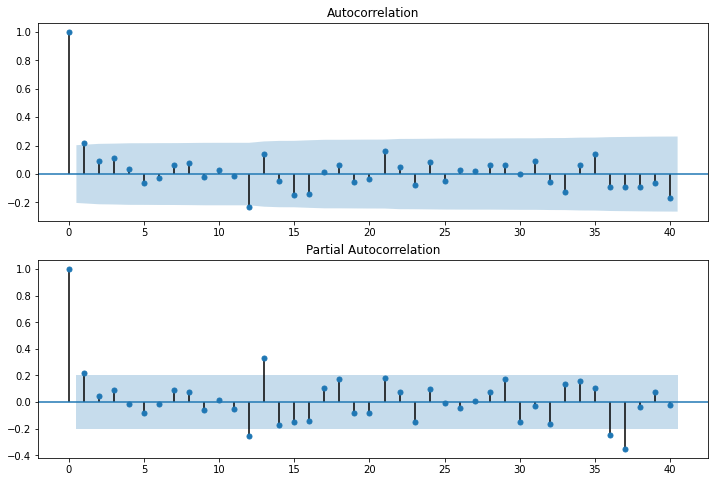

In [62]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df['Seasonal Shift Difference'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df['Seasonal Shift Difference'].dropna(), lags=40, ax=ax2)

Here P = 1 because as we see that in PACF, the PACF value drops suddenly, "shutting off" at the first value of x-axis i.e. 1. While Q is either 0 or 1 because from the ACF, the ACF values should decrease exponentially, so after the first spike, the value of x-axis of 1 has the lower exponential value w.r.t the first one.

# ARIMA should only be selected when data is NON SEASONAL. For seasonal data, SARIMAX needs to be selected.

For Non seasonal Data ARIMA needs to be selected. p=1, q=1 and d=1 because we have taken only first difference according to Dicker Fuller Test.

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 09 Apr 2020   AIC                           1910.251
Time:                        22:37:45   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

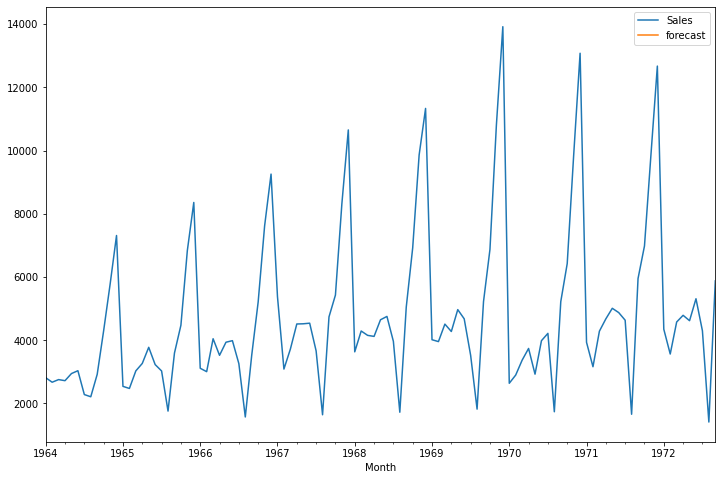

In [69]:
df['forecast']=model_fit.predict(start=105,end=150,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

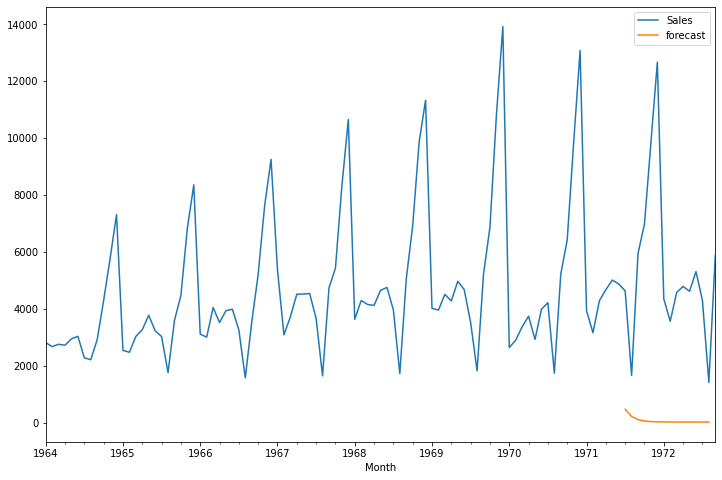

In [70]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

# Lets use SARIMAX for seasonal data here.


In [73]:
import statsmodels.api as sm

In [75]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Thu, 09 Apr 2020   AIC                           1486.804
Time:                                    23:50:30   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

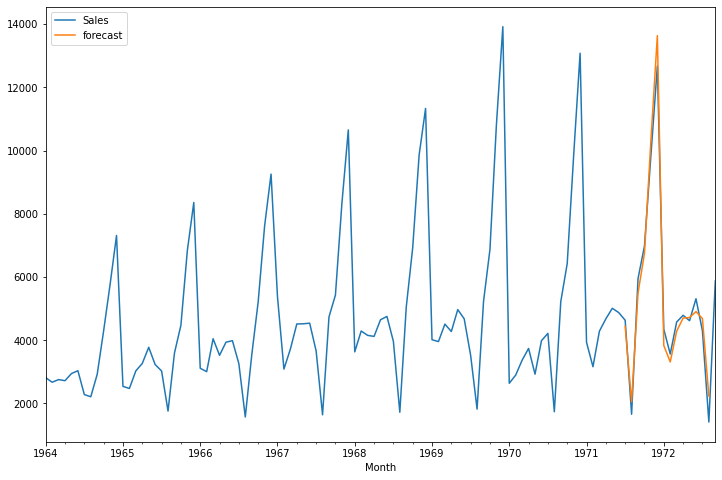

In [77]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

Now to predict the future sales. First we create additional dataframe rows .

In [78]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

Appending the future dates with the existing df.

In [79]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [81]:
future_dates_df.tail(n=24)

,Sales,Sales First Difference,Seasonal Shift Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [83]:
future_df=pd.concat([df,future_dates_df])

In [84]:
future_df.tail(n=30)

,Sales,Sales First Difference,Seasonal Shift Difference,forecast
1972-03-01,4577,1013.0,291.0,4285.475832
1972-04-01,4788,211.0,112.0,4701.092333
1972-05-01,4618,-170.0,-392.0,4717.510397
1972-06-01,5312,694.0,438.0,4906.403743
1972-07-01,4298,-1014.0,-335.0,4685.436040
1972-08-01,1413,-2885.0,-246.0,2232.408304
1972-09-01,5877,4464.0,-74.0,NaN
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


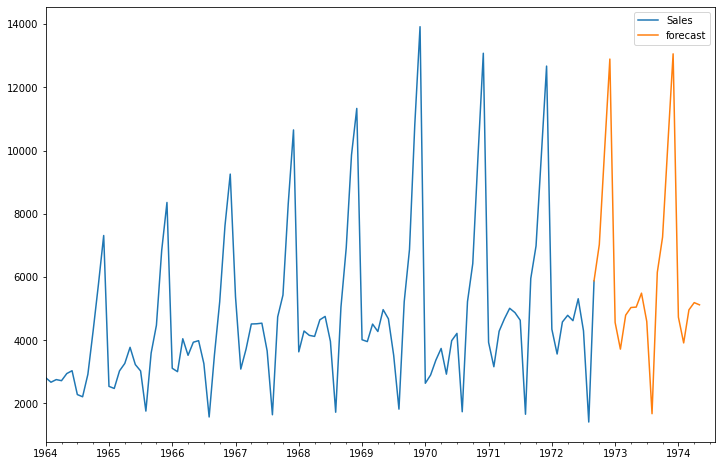

In [85]:
future_df['forecast']=results.predict(start=104,end=124, dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))

****************************************************************************************************************************************************